In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

## 릿지와 라쏘

#### 규제(Rugularization) 
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제어하는 것. 선형 회귀의 경우 계수 즉 기울기의 크기를 작게 만든다.  

#### 릿지(ridge) 회귀 
- 규제가 있는 선형 회귀 모델중 하나이며 선형 모델의 계수를 작게 만들어 과대 적합을 완화시킨다.계수의 제곱 기준 

#### 라쏘(lasso) 회귀 
- 릿지와 같이 규제가 있는 선형 회귀 모델중 하나이며 회귀 계수 값을 0으로 만들수도 있다. 계수의 절대값 기준

## 릿지

In [5]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [7]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

# 타겟 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, \
                                                    random_state=42)

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)


scale = StandardScaler()
scale.fit(X_train_poly)

X_train_scaled = scale.transform(X_train_poly)
X_test_scaled = scale.transform(X_test_poly)

In [11]:
X_test_scaled.shape, X_train_scaled.shape

((14, 55), (42, 55))

In [9]:
X_test_scaled[:2]

array([[-2.29657672, -2.0645632 , -1.95288184, -1.55255604, -1.46585499,
        -1.45227925, -1.38306012, -1.36853915, -1.3414385 , -1.16487216,
        -1.12766176, -1.12993021, -1.09096504, -1.0919529 , -1.08681842,
        -1.05473034, -1.05422049, -1.04733556, -1.03445922, -0.95097661,
        -0.93581382, -0.94095847, -0.92003743, -0.92481854, -0.9257405 ,
        -0.90344054, -0.9076728 , -0.90768173, -0.90365223, -0.88585964,
        -0.88933355, -0.8882214 , -0.88265495, -0.87279092, -0.82345261,
        -0.81922614, -0.82441462, -0.81401521, -0.81951597, -0.82223805,
        -0.80760074, -0.81327179, -0.81584326, -0.81548696, -0.79980303,
        -0.80545985, -0.80768359, -0.80657966, -0.80223729, -0.79049072,
        -0.7959136 , -0.79756241, -0.7954801 , -0.78971903, -0.78033726],
       [-1.1967077 , -0.98223359, -0.85919166, -1.06961356, -0.99185789,
        -0.95563426, -0.92268296, -0.88613609, -0.84269005, -0.95543049,
        -0.92180981, -0.91161782, -0.8899864 , -0.

In [13]:
# from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)


Ridge()

In [ ]:
# alpha=1.0
# 1.0  보다 작으면 약한 규제
# 1.0 보다 크면 강한 규제 

In [21]:
Ridge?

In [14]:
print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_test_scaled, y_test))

0.9896101671037343
0.979069397761539


In [15]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
-358.8506883451272


In [18]:
# 기울기 - 릿지 
print(model_ridge.coef_)
print()
print(model_ridge.coef_.min(), model_ridge.coef_.max(), model_ridge.coef_.mean())

[18.75202605  9.99048537  9.64586193 17.278557   14.42089598 12.69251285
 12.34283964 10.88252862 12.55963482 12.93825844 12.67925897  9.12136175
 12.49327194  9.02641662  8.39716922 12.21409663  8.99564455  8.85968975
 11.68602892  7.48294042  8.98610839  3.37199818 10.27381252  4.61786228
  1.60700275 11.21975321  5.66171476  2.9808368   3.17359806 11.72544455
  6.40554378  4.19129005  5.06384222  8.89201309  1.89344091  4.81186299
 -2.91832747  7.38733861 -0.51038117 -5.91335297  9.5029666   1.56464851
 -3.66645267 -6.13031213 11.06068777  3.21356622 -1.71089861 -3.65107495
 -2.63704498 11.98418393  4.3636902  -0.11776857 -1.40420516  0.45174316
  5.29453248]

-6.130312126090183 18.752026049447025 6.427257142033616


In [19]:
# 기울기 - Linear
print(model_lr.coef_)
print()
print(model_lr.coef_.min(), model_lr.coef_.max(), model_lr.coef_.mean())

[  -589630.50632573     58882.34307393    292479.5752375
   3614696.52944019   2676387.9665871   -4179338.8183397
   1913385.13425657  -7462398.40355898   4644311.62003781
   1112036.24181948 -36636084.82557356   8265194.95413774
  10957186.12609441  44560029.65213348 -18234640.90463739
 -10575138.85150567   7800352.445491   -11116646.09414671
   1508213.95523817  -2366902.43083687  32780600.39125529
  -7086929.3693608    6162417.06085746 -21442493.57754866
    958974.27238497  -6479999.52099698 -16087564.77922762
 -24612355.68888687  26477276.42394566  10193063.31613975
  -2161671.3520718   -1494714.7276726   18751462.9630843
 -11464734.5492194  -16778724.41607646  21634520.1318395
  17961770.55614863 -15580796.56823963  -3698271.78552324
   1658671.18446409 -22830888.79889741   4544534.31191496
 -20028332.69261038  -7658878.7441799   12298552.58593444
  34365168.22879573  14317535.83776338  -3335164.67255283
   5353004.90967735  -4052599.9099707   -8063366.6820366
 -10439620.55746448

In [ ]:
# alpha 값에 따른 점수 리스트 

In [22]:
train_score = []
test_score = []

In [23]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:    
    model_ridge = Ridge(alpha=a)    
    model_ridge.fit(X_train_scaled, y_train)    
    train_score.append(model_ridge.score(X_train_scaled, y_train))
    test_score.append(model_ridge.score(X_test_scaled, y_test))

In [24]:
alpha_list

[0.001, 0.01, 0.1, 1, 10, 100]

In [25]:
# 학습 점수인 경우에는 
# alpha 값이 낮으면 점수가 높아진다 
alpha_list, train_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.9930455252088666,
  0.9917809981250546,
  0.9903815817570369,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494])

In [27]:
# 테스트 점수인 경우에는 
# alpha 값이 낮으면 점수가 낮아진다 
alpha_list, test_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.9569388961553458,
  0.9800187936871929,
  0.9827976465386932,
  0.979069397761539,
  0.9725329582461568,
  0.9627042641050291])

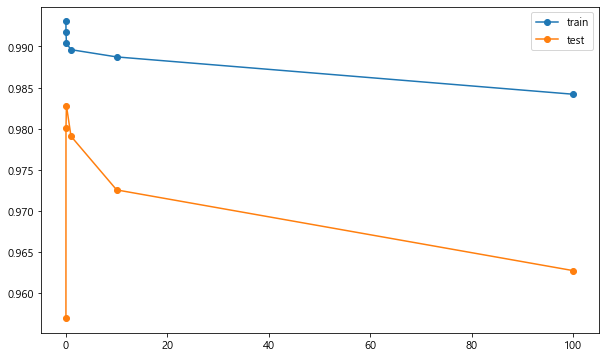

In [31]:
# 시각화 
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.legend()
plt.show()

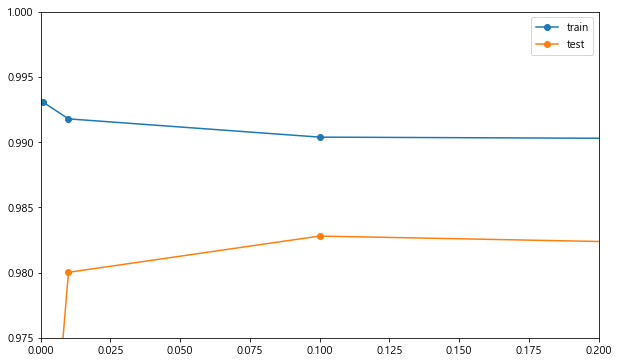

In [32]:
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.xlim([0, 0.2])
plt.ylim([0.975, 1.0])
plt.legend()
plt.show()

In [33]:
# 그래프의 부분 확대 

In [36]:
# 쥬피터노트북의 숫자 옵션 변경 
np.set_printoptions(precision=3, suppress=True)

In [37]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
print(np.log10(alpha_list))
print(10**(np.log10(alpha_list)))

[-3. -2. -1.  0.  1.  2.]
[  0.001   0.01    0.1     1.     10.    100.   ]


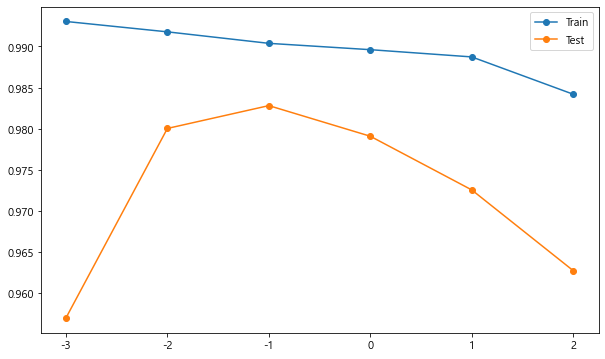

In [39]:
plt.plot(np.log10(alpha_list), train_score, label='Train', marker='o')
plt.plot(np.log10(alpha_list), test_score, label='Test', marker='o')
plt.legend()
plt.show()

In [41]:
# alpha 0.1 로 다시 학습 
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, y_train)

print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_test_scaled, y_test))

0.9903815817570369
0.9827976465386932


In [ ]:
# alpha 1 의 경우 
# 0.9896101671037343
# 0.979069397761539

## 라쏘

In [ ]:
# from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
print(model_lasso.score(X_train_scaled, y_train))

In [ ]:
model_lasso.coef_

In [ ]:
print(model_lasso.score(X_test_scaled, y_test))

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    model_lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    model_lasso.fit(X_train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(model_lasso.score(X_train_scaled, y_train))
    test_score.append(model_lasso.score(X_test_scaled, y_test))

In [ ]:
# np.log10() 이용 
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# 1일때 가장 점수 차이가 적게난다. = 10**(1)

plt.plot(np.log10(alpha_list), train_score, marker='o')
plt.plot(np.log10(alpha_list), test_score, marker='o')
plt.show()

In [ ]:
model_lasso2 = Lasso(alpha=10)
model_lasso2.fit(X_train_scaled, y_train)

print(model_lasso2.score(X_train_scaled, y_train))
print(model_lasso2.score(X_test_scaled, y_test))

In [ ]:
model_lasso2.coef_

In [ ]:
print(np.sum(model_lasso2.coef_ == 0))

# 퀴즈 

- 성별 키와 몸무게(weight-height.csv) 데이타셋을 이용하여 선형, 다항적용, 릿지, 라쏘 모델별로 테스트하고 결과를 확인하여라. 
